In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [245]:
from parsing import parser, digit
from plotting import plotter, voronoi
from analysis import training, sampling, testing, classify
from config import settings

import warnings
warnings.filterwarnings('ignore')

In [214]:
n_observation_classes = 256
n_hidden_states = 30
n_iter = 10000
tol = 0.1

In [215]:
parse = parser.Parser();
train_digits = parse.parse_file('data/pendigits-train');
test_digits = parse.parse_file('data/pendigits-test')

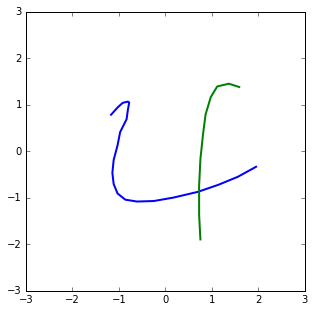

In [216]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(train_digits[6], True)

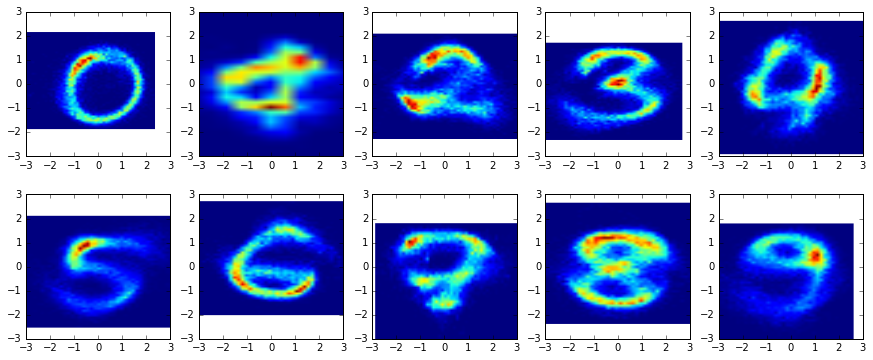

In [217]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digits_heatmap(train_digits, True);

In [218]:
centroids = training.get_digit_kmeans_centroids(train_digits, n_observation_classes - 3)

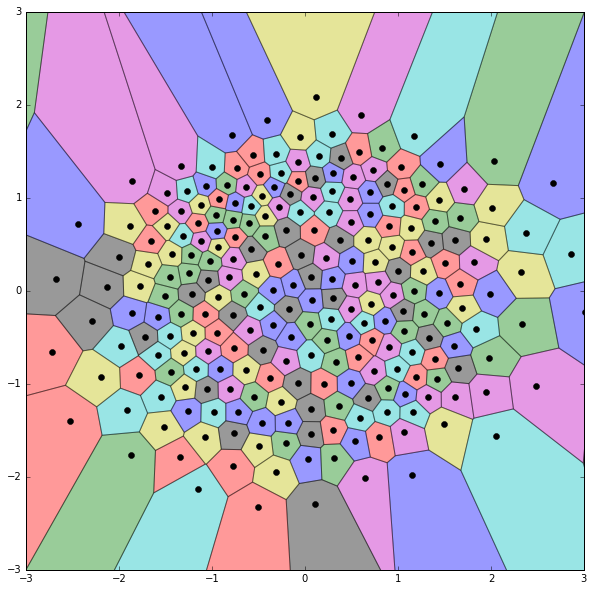

In [219]:
pylab.rcParams['figure.figsize'] = (10, 10);
voronoi.plot_centroids(centroids);

In [220]:
training.set_digit_observations(train_digits, centroids, n_observation_classes)

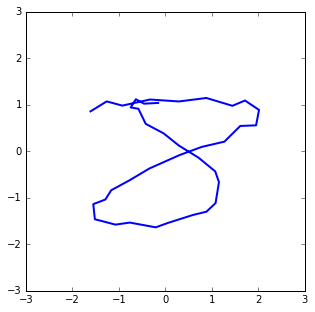

[253, 55, 138, 235, 98, 213, 162, 146, 84, 19, 120, 178, 210, 206, 164, 132, 57, 230, 187, 61, 38, 110, 108, 142, 35, 181, 81, 103, 111, 201, 236, 249, 96, 244, 192, 189, 233, 185, 121, 254, 255]


In [560]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit_observations(train_digits[11], centroids, n_observation_classes, True)

In [222]:
hidden_markov_models = training.train_hmm(train_digits, n_observation_classes, n_hidden_states, n_iter, tol)

In [223]:
samplings = sampling.get_samplings(hidden_markov_models, n_observation_classes, centroids, 100)

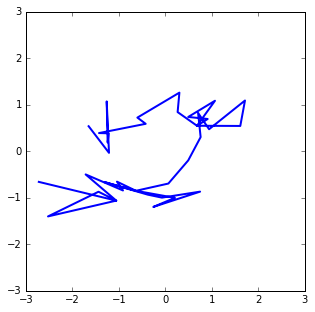

In [556]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(samplings[0][8], True)

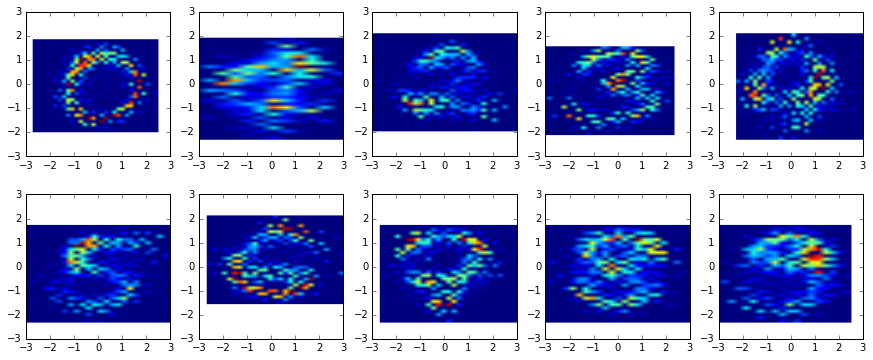

In [225]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digit_samples_heatmap(samplings)

In [509]:
test_labels_probabilities = classify.get_labels_probabilities(test_digits, hidden_markov_models, centroids, n_observation_classes, n_hidden_states,
                                                               n_iter, tol, True, True, "test_labels_probabilities.dat")

In [582]:
test_classifier = classify.WeightedClassifier(test_digits, test_labels_probabilities)
prediction_matrix = test_classifier.get_prediction_matrix()
for row in prediction_matrix:
    print(row)

[328, 0, 0, 0, 1, 0, 1, 0, 33, 0]
[1, 282, 49, 1, 0, 1, 0, 5, 14, 11]
[0, 22, 326, 0, 3, 0, 0, 9, 3, 1]
[0, 5, 0, 312, 0, 4, 0, 2, 2, 11]
[0, 5, 12, 0, 160, 0, 2, 0, 160, 24]
[0, 0, 2, 0, 0, 73, 5, 0, 193, 62]
[3, 3, 0, 0, 0, 0, 310, 0, 18, 2]
[0, 55, 20, 23, 0, 0, 0, 24, 51, 191]
[0, 1, 0, 0, 0, 9, 0, 0, 307, 19]
[0, 10, 0, 0, 1, 6, 0, 1, 6, 312]


In [518]:
test_classifier.print_classification_performance()

total classification accuracy : 69.60251644266515
label 1 : 90.35812672176309
label 2 : 77.47252747252747
label 3 : 89.56043956043956
label 4 : 92.85714285714286
label 5 : 44.07713498622589
label 6 : 21.791044776119403
label 7 : 92.26190476190476
label 8 : 6.593406593406593
label 9 : 91.36904761904762
label 0 : 92.85714285714286


In [567]:
gaussian_hidden_markov_models = training.train_gaussian_hmm(train_digits, n_hidden_states, n_iter, tol)

In [570]:
for i in range(0, 10):
    print(classify.get_gaussian_hmm_probability(test_digits[0], gaussian_hidden_markov_models[i]))

-85.3174667263
-304.582351302
-212.766422804
-82.5324956152
-28.4598359226
-293.374894692
-172.812791103
9.64127185866
-16.3436783895
-142.691638808


In [571]:
print(test_digits[0].label)

8


In [583]:
gaussian_test_labels_probabilities = classify.get_gaussian_labels_probabilities(test_digits, gaussian_hidden_markov_models, n_observation_classes, n_hidden_states,
                                                               n_iter, tol, True, True, "gaussian_test_labels_probabilities.dat")

In [584]:
gaussian_test_classifier = classify.GaussianClassifier(test_digits, gaussian_test_labels_probabilities)
prediction_matrix = gaussian_test_classifier.get_prediction_matrix()
for row in prediction_matrix:
    print(row)

[332, 0, 0, 0, 4, 0, 0, 0, 27, 0]
[1, 306, 45, 0, 0, 0, 1, 5, 2, 4]
[0, 12, 350, 0, 1, 0, 0, 1, 0, 0]
[0, 3, 0, 324, 0, 0, 0, 3, 0, 6]
[0, 2, 0, 0, 328, 2, 0, 0, 15, 16]
[0, 2, 0, 0, 0, 315, 0, 0, 14, 4]
[6, 0, 0, 0, 0, 0, 329, 0, 1, 0]
[0, 38, 0, 0, 1, 0, 0, 323, 0, 2]
[0, 0, 0, 0, 0, 2, 0, 0, 327, 7]
[0, 8, 0, 0, 1, 0, 0, 2, 2, 323]


In [585]:
gaussian_test_classifier.print_classification_performance()

total classification accuracy : 93.13697454961395
label 1 : 91.46005509641873
label 2 : 84.06593406593407
label 3 : 96.15384615384616
label 4 : 96.42857142857143
label 5 : 90.35812672176309
label 6 : 94.02985074626865
label 7 : 97.91666666666667
label 8 : 88.73626373626374
label 9 : 97.32142857142857
label 0 : 96.13095238095238
